# Harvesting Hope: Revolutionizing Farming Practices for Sustainable Crop Yield Growth

### Notebook by [Aymen Mohamed](https://aymenm23.github.io/Aymenm23/)
#### [BrainStation - Data Science](https://brainstation.io/)

## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [Required libraries](#Required-libraries)

4. [The problem domain](#The-problem-domain)

5. [Step 1: Answering the question](#Step-1:-Answering-the-question)

6. [Step 2: Checking the data](#Step-2:-Checking-the-data)

7. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

    - [Bonus: Testing our data](#Bonus:-Testing-our-data)

8. [Step 4: Exploratory analysis](#Step-4:-Exploratory-analysis)

9. [Step 5: Classification](#Step-5:-Classification)

    - [Cross-validation](#Cross-validation)

    - [Parameter tuning](#Parameter-tuning)

10. [Step 6: Reproducibility](#Step-6:-Reproducibility)

11. [Conclusions](#Conclusions)

12. [Further reading](#Further-reading)

13. [Acknowledgements](#Acknowledgements)

## Introduction

[[ go back to the top ]](#Table-of-contents)

The world is going hungry at unforeseen rates. The Global Hunger Index (GHI) is reporting:

43 countries have alarming or serious levels of hunger
18 countries with moderate, serious, or alarming hunger levels have higher 2023 GHI scores than 2015
58 countries will fail to reach a low level of hunger by 2030

This crisis has global implications and needs all of our help to be stopped. 

In this notebook, I'm going to focus on farming practices and attempt to answer the ultimate question which is **are countries utilizing their land in the most efficient manner?**

My analysis will focus on two countries of similar size on opposite ends of the hunger index. The features I will be focusing on include Area Harvested, Yield(predicted variable), temperature, precipitation, humidity, Soil_PH, Soil_Nitrogen, Soil_OM, Vegetation Health Index (VHI), Agricultural Stress Index (ASI) and Crop type.

The ultimate intention of this study is to train a model on all of these various features and see how they contribute to crop yield for a specific crop type. 

**INTENDED USAGE**

The idea behind this is that once trained enough I would like the model to provide a semi-accurate prediction of crop yield based on the features. Then I would like that predicted value to be compared against the actual yield so it acts as an indicator on whether or not the country is meeting its potential.

## License

[[ go back to the top ]](#Table-of-contents)

Please see the [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. In general, I have licensed this material so that it is as widely usable and shareable as possible.

## Required libraries

[[ go back to the top ]](#Table-of-contents)


This notebook uses several Python packages. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.


## The Problem Domain

[[ go back to the top ]](#Table-of-contents)

How can we assess if countries are utilizing their arable land to full potential? 

Utilizing Food and Agriculture Organization (FAO) data for two similarily sized countries try to pinpoint how they differentiate and why one country has a larger yield over the other.

Our two countries:

**Yemen** - Currently undergoing the world's **WORST** humanitarian crisis.

<img src="img/yemen.jpg" />

**Thailand** - Moderate GHI score and closely similar to Yemen in size.

<img src="img/Thailand.png" />



**Note:** The dataset we're working with is mostly from the FAO but does include some imputed values and has some feature-engineered columns.

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to predict crop yield based on various climate and soil composition features.

>Did you define the metric for success before beginning?

Since we established that our problem is a regression problem we will evaluate the model based on R2 score and Mean Squared Error (MSE). R2 is responsible for demonstrating how much of our features contribute to the actual prediction and MSE measures how close a regression line is to a set of data points.

>Did you understand the context for the question and the scientific or business application?

We're creating a predictive model that has the capability of predicting crop yield for specific types of crops based on various features.

>Did you record the experimental design?

The data is collected by FAO researchers and compiled in various databases. The data includes maps, soils samples, satelite data, agricultural records, and historical climate data.

>Did you consider whether the question could be answered with the available data?

The dataset we currently have is only for two moderately sized countries and is devoid of economic and sociopolitical factors which can play a role in accurate predictive analysis. That said, our dataset is capable of working but with real world limitations.


## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Are there any nulls or duplicates?
* Are there any non-numerical features?
* Do I need to fix or remove any of the data?

Our data was preprocessed and organized on SQL so we will go through the some of the motions for show.

In [1]:
import pandas as pd

df = pd.read_csv('categorized_ty.csv')
df.head()

,Area,Item,Year,Area_harvested,Yield,temperature,precipitation,humidity,Soil_PH,Soil_Nitrogen,Soil_OM,VHI,ASI,Category
0,Thailand,Areca nuts,1961,0.0,0.0,26.23,1740.10,78.50,4.33,0.92,3.69,0.36,19.17,Nuts and Seeds
1,Thailand,Areca nuts,1962,0.0,0.0,26.08,1586.14,76.30,5.95,4.05,2.66,0.55,3.96,Nuts and Seeds
2,Thailand,Areca nuts,1963,0.0,0.0,26.07,1664.81,77.30,4.72,1.49,3.91,0.40,8.93,Nuts and Seeds
3,Thailand,Areca nuts,1964,0.0,0.0,26.14,1689.46,73.19,4.89,3.02,3.65,0.43,7.68,Nuts and Seeds
4,Thailand,Areca nuts,1965,0.0,0.0,26.28,1600.65,73.50,4.50,2.43,2.92,0.41,18.26,Nuts and Seeds


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7893 entries, 0 to 7892
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            7893 non-null   object 
 1   Item            7893 non-null   object 
 2   Year            7893 non-null   int64  
 3   Area_harvested  7893 non-null   float64
 4   Yield           7893 non-null   float64
 5   temperature     7893 non-null   float64
 6   precipitation   7893 non-null   float64
 7   humidity        7893 non-null   float64
 8   Soil_PH         7893 non-null   float64
 9   Soil_Nitrogen   7893 non-null   float64
 10  Soil_OM         7893 non-null   float64
 11  VHI             7893 non-null   float64
 12  ASI             7893 non-null   float64
 13  Category        7893 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 863.4+ KB


We're in luck! The data seems to be in a usable format.

As we can see there are 14 features, 7892 rows and only two categorical columns.

Off of first glance lets one-hot encode our category column.

In [3]:
df_encoded = pd.get_dummies(df, columns=['Category'])

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Area,Item,Year,Area_harvested,Yield,temperature,precipitation,humidity,Soil_PH,Soil_Nitrogen,Soil_OM,VHI,ASI,Category_Fruits,Category_Grains and Pulses,Category_Nuts and Seeds,Category_Other,Category_Other Crops,Category_Stimulant and Spice Crops,Category_Vegetables
0,Thailand,Areca nuts,1961,0.0,0.0,26.23,1740.10,78.50,4.33,0.92,3.69,0.36,19.17,False,False,True,False,False,False,False
1,Thailand,Areca nuts,1962,0.0,0.0,26.08,1586.14,76.30,5.95,4.05,2.66,0.55,3.96,False,False,True,False,False,False,False
2,Thailand,Areca nuts,1963,0.0,0.0,26.07,1664.81,77.30,4.72,1.49,3.91,0.40,8.93,False,False,True,False,False,False,False
3,Thailand,Areca nuts,1964,0.0,0.0,26.14,1689.46,73.19,4.89,3.02,3.65,0.43,7.68,False,False,True,False,False,False,False
4,Thailand,Areca nuts,1965,0.0,0.0,26.28,1600.65,73.50,4.50,2.43,2.92,0.41,18.26,False,False,True,False,False,False,False


Next, it's always a good idea to look at the distribution of our data — especially the outliers.

In [4]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

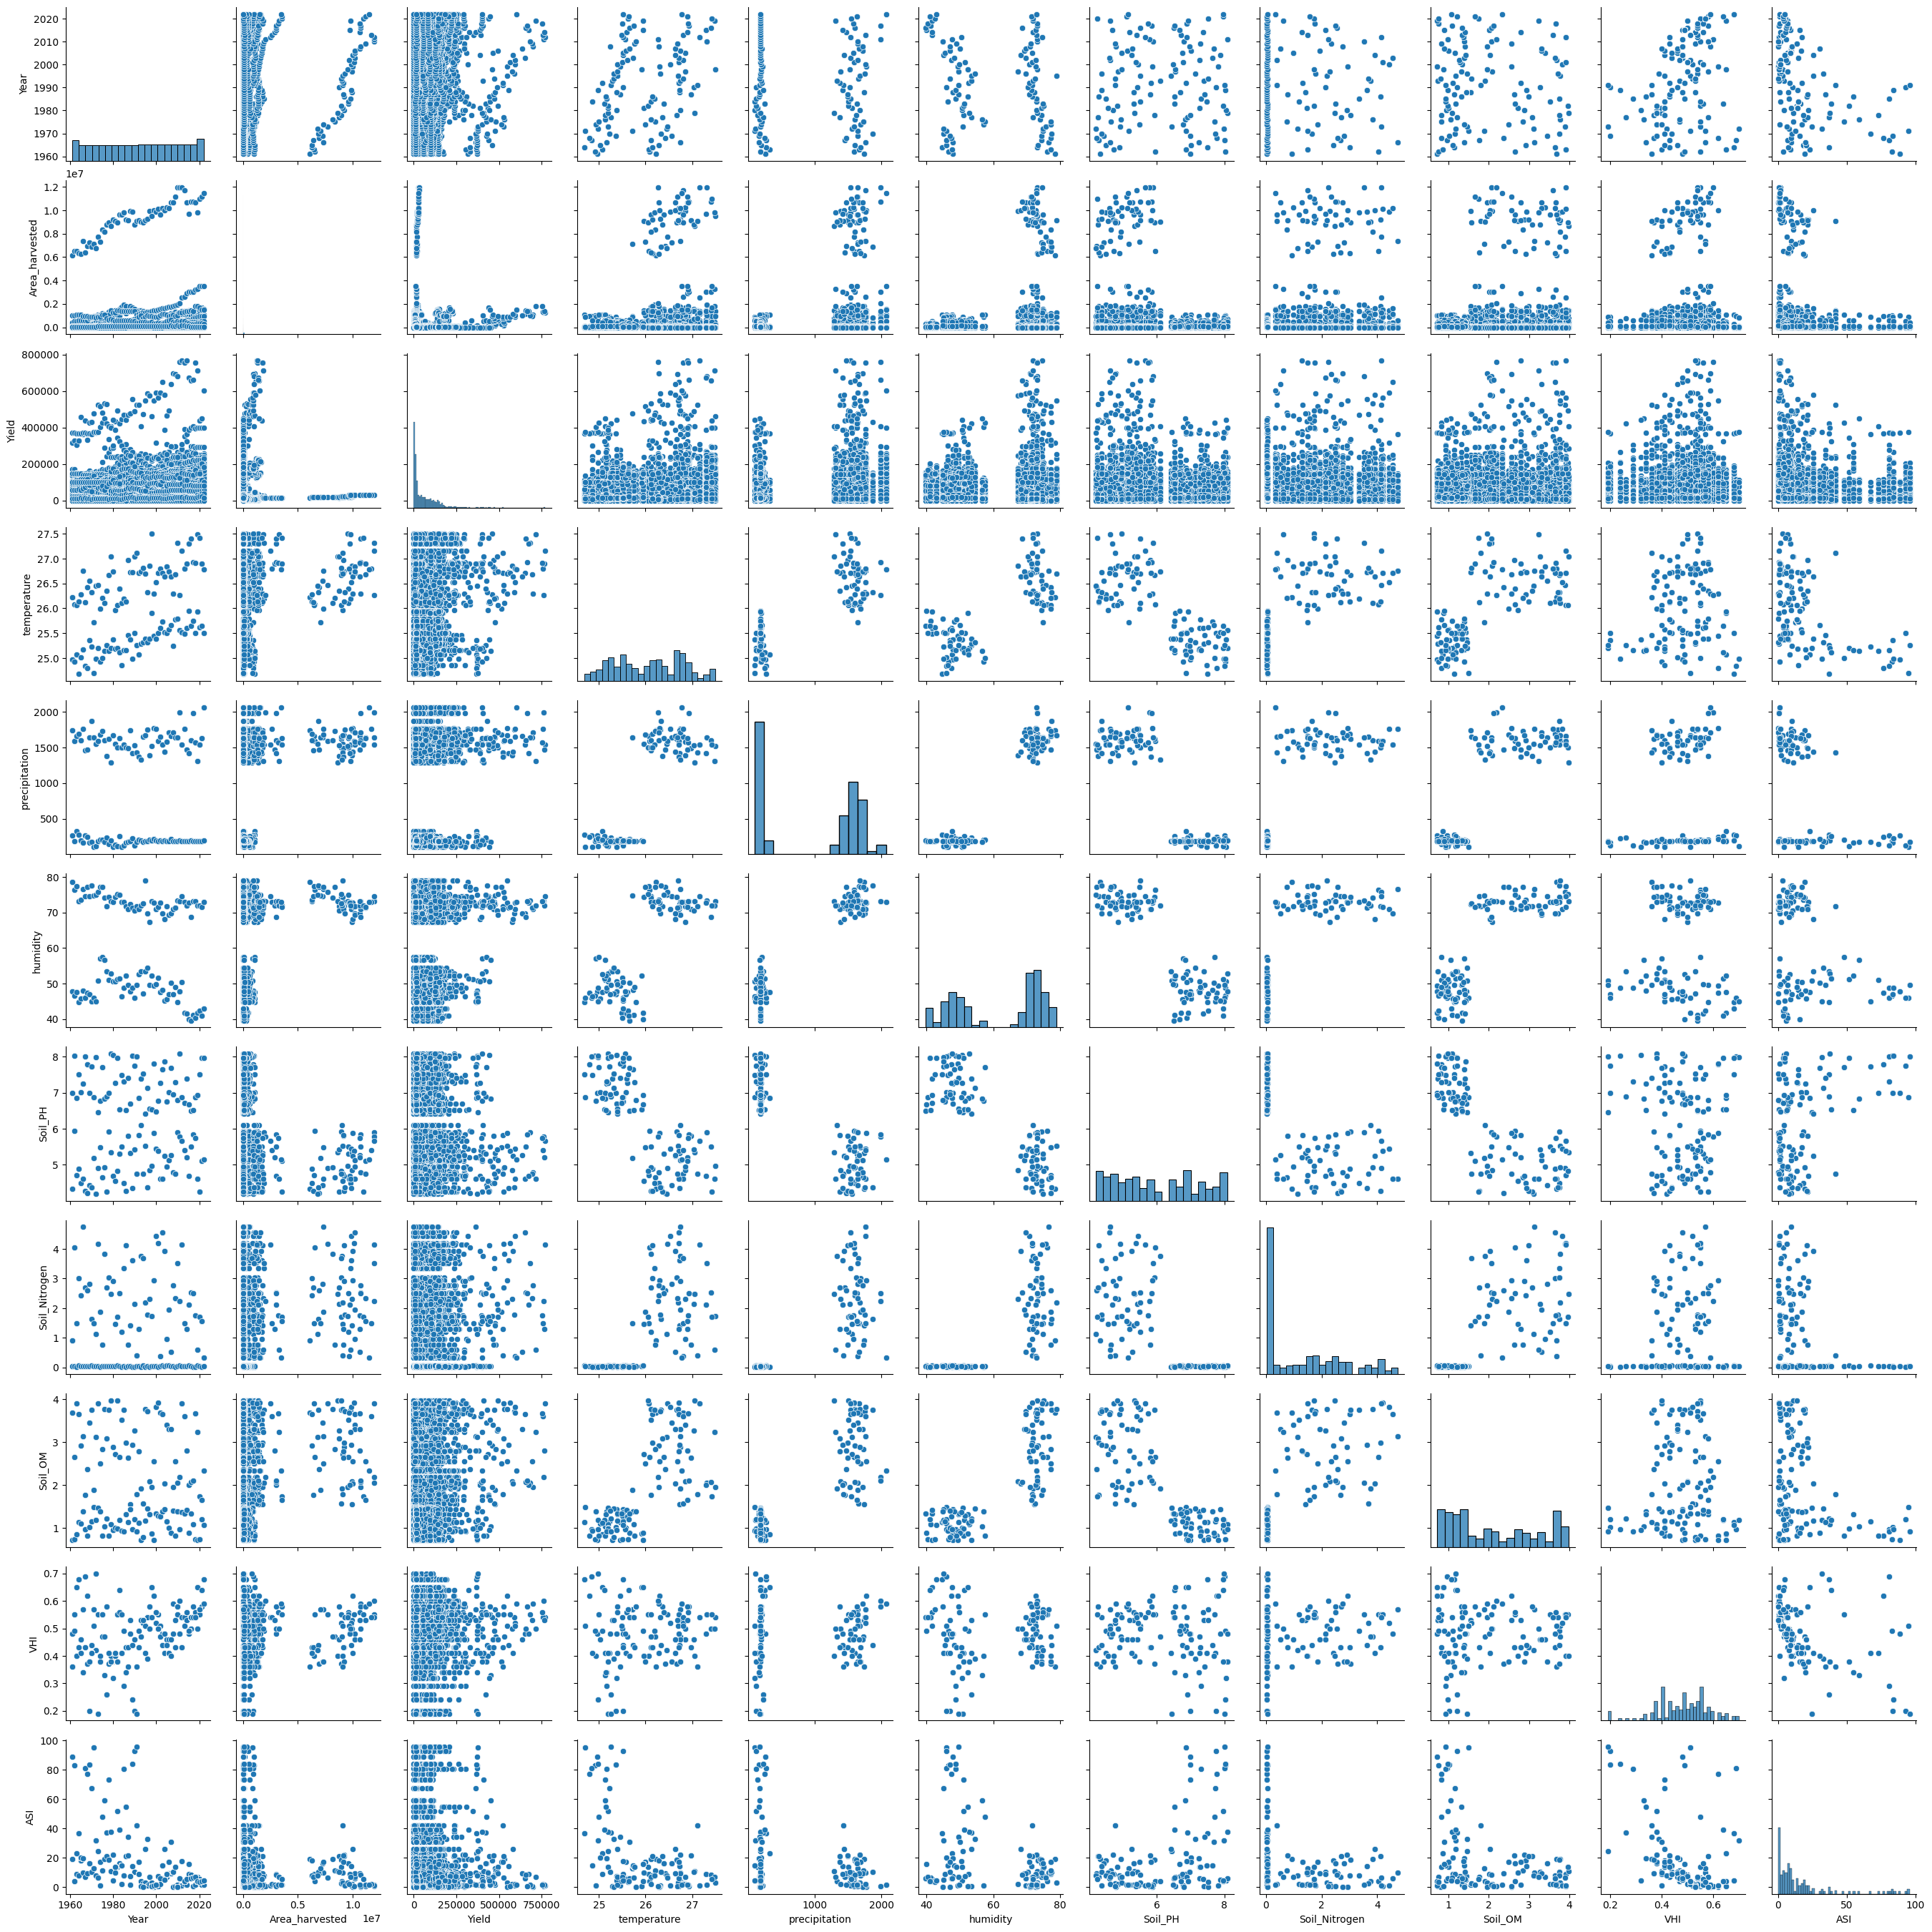

''

In [5]:
# We have to use numeric columns only (note we are using the unencoded version)
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create scatter plot matrix
sns.pairplot(df[numeric_columns.columns])
plt.show()
;

From the scatterplot matrix, we can assess how each feature interacts with each other

## Step 3: Tidying the data

[[ go back to the top ]](#Table-of-contents)

Even though our data is already cleaned and ready for modeling this is where we would perform the cleaning process.

In [6]:
# Remove nans, nulls and dupes
# Now for our use case it will throw off our model when there are instances of 0 in our predicted column (yield). So lets drop!
# Dropping rows where 'Area_harvested' and 'Yield' columns is equal to 0
df_encoded = df_encoded[df_encoded['Area_harvested'] != 0]
df_encoded = df_encoded[df_encoded['Yield'] != 0]

In [7]:
# Check for nulls, nans and dupes
# Checking for NaNs/Nulls
null_counts = df_encoded.isna().sum()
print("Null counts:")
print(null_counts)

# Checking for duplicates
duplicate_rows = df_encoded[df_encoded.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)

Null counts:
Area                                  0
Item                                  0
Year                                  0
Area_harvested                        0
Yield                                 0
temperature                           0
precipitation                         0
humidity                              0
Soil_PH                               0
Soil_Nitrogen                         0
Soil_OM                               0
VHI                                   0
ASI                                   0
Category_Fruits                       0
Category_Grains and Pulses            0
Category_Nuts and Seeds               0
Category_Other                        0
Category_Other Crops                  0
Category_Stimulant and Spice Crops    0
Category_Vegetables                   0
dtype: int64

Duplicate rows:
Empty DataFrame
Columns: [Area, Item, Year, Area_harvested, Yield, temperature, precipitation, humidity, Soil_PH, Soil_Nitrogen, Soil_OM, VHI, ASI, Category_

Much better!

The general takeaways here should be:

* Make sure your data is encoded properly

* Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

* Deal with missing data in one way or another: replace it if you can or drop it

* Never tidy your data manually because that is not easily reproducible

* Use code as a record of how you tidied your data

* Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

## Step 4: Exploratory analysis

[[ go back to the top ]](#Table-of-contents)

Now after spending entirely too much time tidying our data, we can start analyzing it!

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

* How is my data distributed?

* Are there any correlations in my data?

* Are there any confounding factors that explain these correlations?

This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.

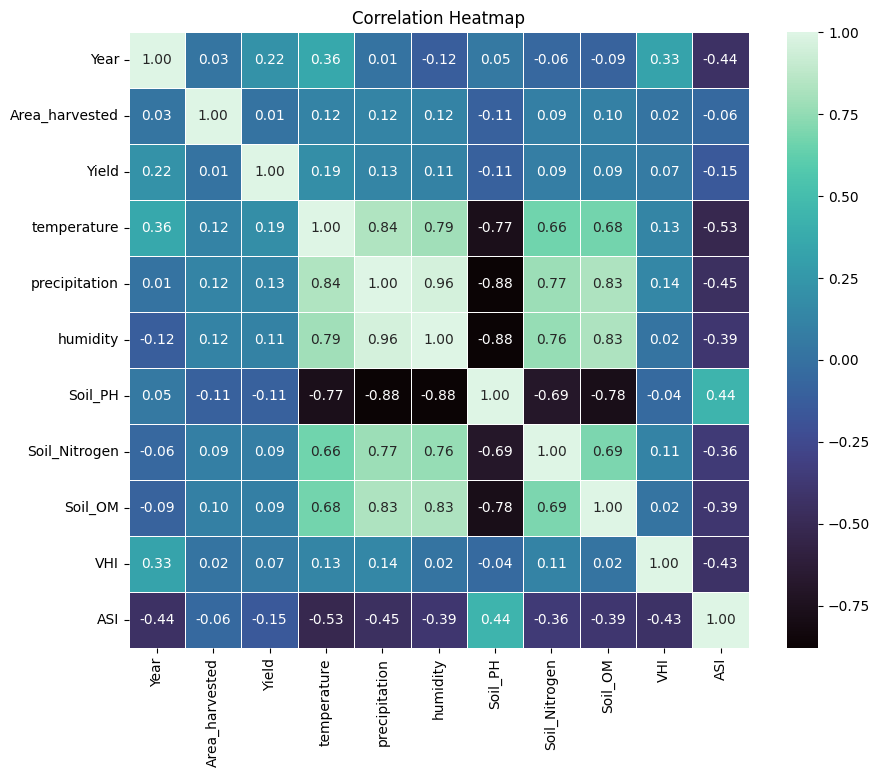

In [8]:
# Drop non-numeric columns

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap with green and blue color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# plt.savefig('capstone_heatmap2.png')
plt.show()

This correlation matrix allows me to piggyback off of the pairplot above and get a numeric representation of how each column relates to one another.

This is important because naturally we would expect there to be various positive correlations between climate and soil data.

Lets look at how the climate data differs between the two countries.

**NOTE** we have to split the dataset the highlight the two countries.

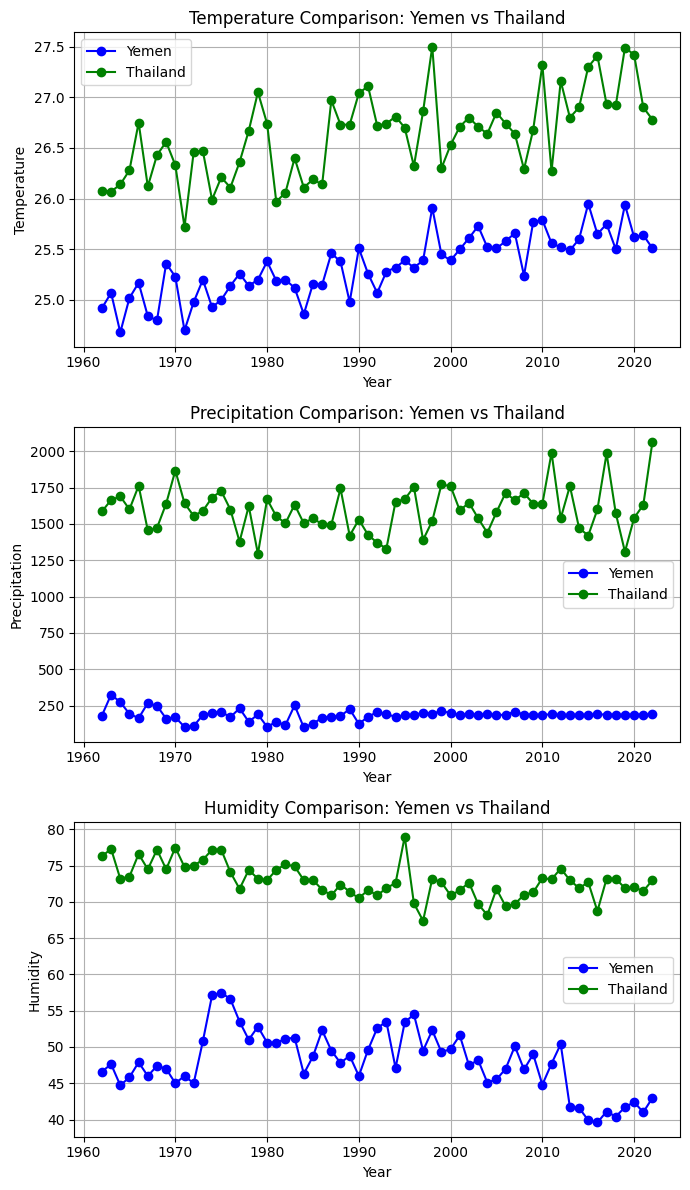

In [9]:
# Partition Datset
th = df.iloc[1:62]
ye = df.iloc[-62:]

# Merge the dataframes on the 'Year' column
merged_df = pd.merge(ye, th, on='Year', suffixes=('_ye', '_th'))

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(7, 12))

# Plot temperature
axes[0].plot(merged_df['Year'], merged_df['temperature_ye'], label='Yemen', marker='o', color='blue')
axes[0].plot(merged_df['Year'], merged_df['temperature_th'], label='Thailand', marker='o', color='green')
axes[0].set_ylabel('Temperature')
axes[0].set_xlabel('Year')
axes[0].set_title('Temperature Comparison: Yemen vs Thailand')
axes[0].legend()
axes[0].grid(True)

# Plot precipitation
axes[1].plot(merged_df['Year'], merged_df['precipitation_ye'], label='Yemen', marker='o', color='blue')
axes[1].plot(merged_df['Year'], merged_df['precipitation_th'], label='Thailand', marker='o', color='green')
axes[1].set_ylabel('Precipitation')
axes[1].set_xlabel('Year')
axes[1].set_title('Precipitation Comparison: Yemen vs Thailand')
axes[1].legend()
axes[1].grid(True)

# Plot humidity
axes[2].plot(merged_df['Year'], merged_df['humidity_ye'], label='Yemen', marker='o', color='blue')
axes[2].plot(merged_df['Year'], merged_df['humidity_th'], label='Thailand', marker='o', color='green')
axes[2].set_ylabel('Humidity')
axes[2].set_title('Humidity Comparison: Yemen vs Thailand')
axes[2].legend()
axes[2].grid(True)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

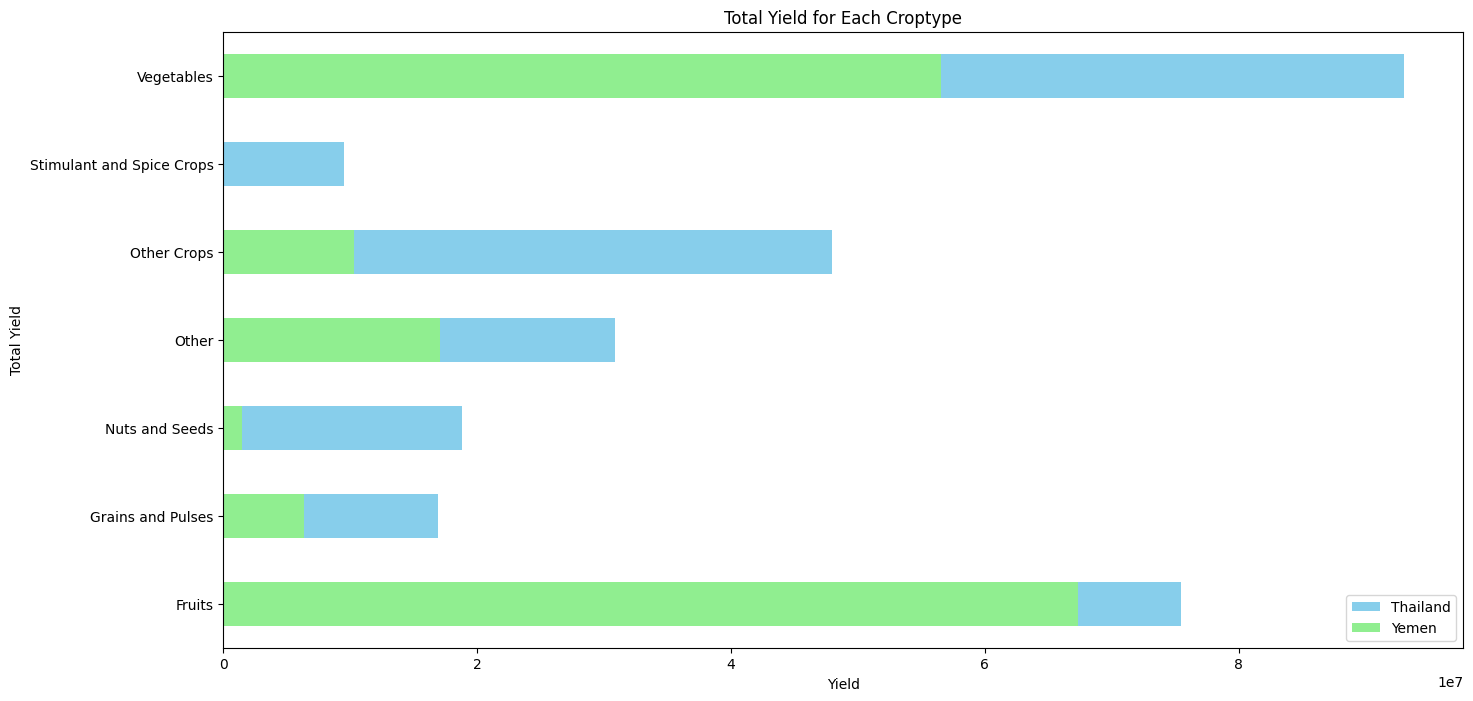

In [10]:
# Lets check the Yield distribiton between the two countries:
# Calculate total yield for each crop and country
total_yield = df.groupby(['Area', 'Category'])['Yield'].sum().reset_index()

# Pivot the DataFrame to have countries as columns
pivot_df = total_yield.pivot(index='Category', columns='Area', values='Yield')

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot for Thailand
pivot_df['Thailand'].plot(kind='barh', ax=ax, color='skyblue', label='Thailand')

# Plot for Yemen
pivot_df['Yemen'].plot(kind='barh', ax=ax, color='lightgreen', label='Yemen')

# Set title and labels
ax.set_title('Total Yield for Each Croptype')
ax.set_ylabel('Total Yield')
ax.set_xlabel('Yield')

# Add legend
ax.legend()

# Show the plot
plt.show()

Enough flirting with the data. Let's get to modeling.

## Step 5: Regression

[[ go back to the top ]](#Table-of-contents)

Wow, all this work and we *still* haven't modeled the data!

As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty regression model.

Remember: **Bad data leads to bad models.** Always check your data first.

<hr />

Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.

A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

In [11]:
# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Yield', 'Area', 'Item'])
y = df_encoded['Yield'] 

Now our data is ready to be split.

In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

With our data split, we can start fitting models to our data. Our approach will revolve around RandomForestRegressor and Gradient Boost.

A random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Here's an example of a RandomForest:

<img src="img/RandomForestRegressor.png" />

Notice how this is essentially decision trees that they average out into one cumulative score or in other words the RandomForest.

The nice part about RandomForests is that they are **scale-invariant**, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; RandomForests will work with them just the same.


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Model selection and training
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Model evaluation
y_pred = rf.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred),2)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2) # Indicates that my features account for X% of predictability

Mean Squared Error: 1736389872.98
R-squared Score: 0.7036232240392789


Heck yeah! Our model achieves 70% R2 without much effort.

However, there's a catch: Depending on how our training and testing set was sampled, our model can actually be operating at much lower standards.

Mean R-squared Score: 0.6325603093830108


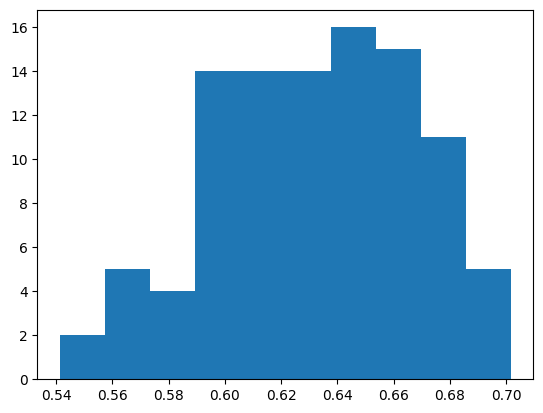

In [14]:
# Collecting model accuracies
model_accuracies = []

# Running 1000 repetitions of training and testing
for repetition in range(100):
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Initializing and training a Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    
    # Evaluating regressor accuracy
    y_pred = rf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Appending accuracy to list of model accuracies
    model_accuracies.append(r2)

# Visualizing model accuracies with a histogram
plt.hist(model_accuracies)

# Printing evaluation metrics
print('Mean R-squared Score:', sum(model_accuracies) / len(model_accuracies))

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as **overfitting**: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.

### Cross-validation

[[ go back to the top ]](#Table-of-contents)

This problem is the main reason that most data scientists perform ***k*-fold cross-validation** on their models: Split the original data set into *k* subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated *k* times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:

(each square is an entry in our data set)

In [15]:
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform cross-validation with 10 folds
scores = cross_val_score(rf, X, y, cv=10, scoring='r2')

# Print the R-squared scores for each fold
print("R-squared scores for each fold:", scores)

# Calculate and print the mean R-squared score
mean_r2_score = scores.mean()
print("Mean R-squared score:", mean_r2_score)

R-squared scores for each fold: [ 0.24152956  0.11270852 -5.50106345 -3.71527511 -1.35601584 -0.10825818
  0.06580828 -0.01171182  0.07145881  0.1840701 ]
Mean R-squared score: -1.0016749136568388


After running a 10 fold cross validation this shows that our model is not very good at capturing the underlying pattern based on the features.

Now we have a much more consistent rating of our regressor's general prediction accuracy.

### Parameter tuning

[[ go back to the top ]](#Table-of-contents)

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our regressor. Lets check what parameters are currently being used in our data.

In [16]:
# Lets see what parameters are currently in use:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Now that we know which params are currently in use, lets look at tuning them.

Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

The most common method for model parameter tuning is **Grid Search**. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our RandomForest. We'll stick to only five parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

In [17]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1,  error_score='raise')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, error_score='raise', estimator=RandomForestRegressor(),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [19]:
best_params = rf_random.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


In [20]:
# Create a new instance of RandomForestRegressor with the best parameters
best_rf_model = RandomForestRegressor(**best_params)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = best_rf_model.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred),2)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2) 

Mean Squared Error: 3645820067.59
R-squared Score: 0.4065270710144412


In [21]:
# Perform cross-validation with 10 folds
scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='r2')

# Print the R-squared scores for each fold
print("R-squared scores for each fold:", scores)

# Calculate and print the mean R-squared score
mean_r2_score = scores.mean()
print("Mean R-squared score:", mean_r2_score)

R-squared scores for each fold: [ 0.32710832  0.43615852 -3.70929306 -2.299646    0.17952981 -0.09007383
  0.44404339  0.10810344  0.10883512  0.1954909 ]
Mean R-squared score: -0.42997433946045954


As we can see what we sacrificed on initial R2 score we made up for in mean R2 Score. Sometimes in data science you have to sacrifice your pawn!

Now let's visualize the grid search to see how the parameters interact.

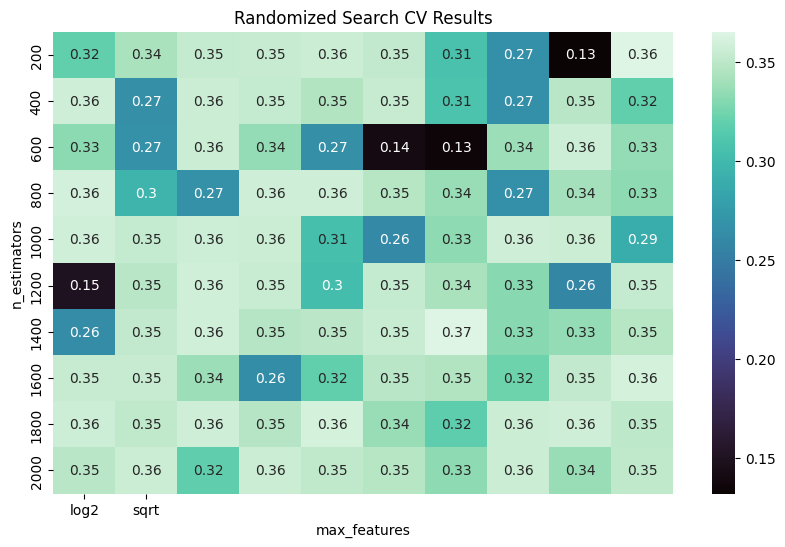

In [22]:
# Access the mean test scores from RandomizedSearchCV results
grid_visualization = rf_random.cv_results_['mean_test_score']
grid_visualization.shape = (10, 10)  # Assuming grid size is (10, 10)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grid_visualization, cmap='mako', annot=True)

# Set ticks and labels for x-axis (max_features)
max_features_values = np.sort(np.unique(rf_random.param_distributions['max_features']))
plt.xticks(np.arange(len(max_features_values)) + 0.5, max_features_values)
plt.xlabel('max_features')

# Set ticks and labels for y-axis (n_estimators)
n_estimators_values = np.sort(np.unique(rf_random.param_distributions['n_estimators']))
plt.yticks(np.arange(len(n_estimators_values)) + 0.5, n_estimators_values)
plt.ylabel('n_estimators')

plt.title('Randomized Search CV Results')
plt.show()

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision.

Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [23]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the RandomForestRegressor
random_forest_regressor = RandomForestRegressor()

# Define the parameter grid
parameter_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'criterion': ['friedman_mse', 'absolute_error'],  # Criterion for splitting
    'max_depth': [1, 2, 3, 4, 5],  # Maximum depth of the trees
    'max_features': [1, 2, 3, 4]  # Number of features to consider at each split
}

# Define the cross-validation strategy
cross_validation = KFold(n_splits=10)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_regressor, 
    param_grid=parameter_grid,
    cv=cross_validation,
    error_score='raise',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best score and best parameters
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.2933607319480398
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 4, 'n_estimators': 150}


In [24]:
# This model is capable of predicting the crop yield for a crop type based on various factors.

from sklearn.pipeline import Pipeline

# Define the features (X) and target variable (y)
X = df_encoded[['Area_harvested', 'temperature', 'precipitation', 'humidity', 'Soil_PH', 'Soil_Nitrogen', 'Soil_OM', 'VHI', 'ASI', 
        'Category_Fruits', 'Category_Grains and Pulses', 'Category_Nuts and Seeds', 'Category_Other', 'Category_Other Crops', 
        'Category_Stimulant and Spice Crops', 'Category_Vegetables']]
y = df_encoded['Yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Access the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Create a new RandomForestRegressor with the best parameters
best_random_forest = RandomForestRegressor(**best_params)

# Create pipeline
pipeline = Pipeline(steps=[
    ('model', best_random_forest)  # Use best_random_forest instead of model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on new input data
def predict_yield(area_harvested, temperature, precipitation, humidity, soil_ph, soil_nitrogen, soil_om, vhi, asi, 
                  category_fruits, category_grains, category_nuts, category_other, category_other_crops, 
                  category_spice_crops, category_vegetables):
    input_data = pd.DataFrame({
        'Area_harvested': [area_harvested],
        'temperature': [temperature],
        'precipitation': [precipitation],
        'humidity': [humidity],
        'Soil_PH': [soil_ph],
        'Soil_Nitrogen': [soil_nitrogen],
        'Soil_OM': [soil_om],
        'VHI': [vhi],
        'ASI': [asi],
        'Category_Fruits': [category_fruits],
        'Category_Grains and Pulses': [category_grains],
        'Category_Nuts and Seeds': [category_nuts],
        'Category_Other': [category_other],
        'Category_Other Crops': [category_other_crops],
        'Category_Stimulant and Spice Crops': [category_spice_crops],
        'Category_Vegetables': [category_vegetables]
    })
    
    return pipeline.predict(input_data)

# Example usage:
predicted_yield = predict_yield(113221.44, 26.62, 1602.57, 73.07, 5.03, 2.34, 2.91, 0.49, 8.9, 1, 0, 0, 0, 0, 0, 0)
print("Predicted crop yield:", predicted_yield)

Predicted crop yield: [118132.23771006]


In [25]:
PV = 122403.94
AV = 137430.05
percent_difference = ((PV - AV) / PV) * 100
print(f"Percent difference between the two values is: {percent_difference:.2f}%")

Percent difference between the two values is: -12.28%


Now we can run one more GridSearch to assess if GradientBoost is a good model for this usecase:

<Axes: >

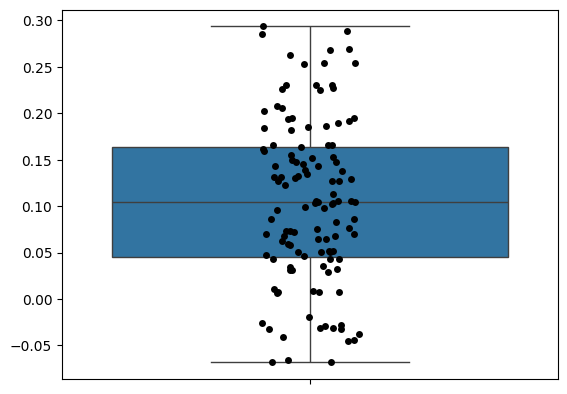

In [26]:
# Access the cross-validation scores
rf_cv_scores = grid_search.cv_results_['mean_test_score']

# Create boxplot and stripplot
sns.boxplot(rf_cv_scores)
sns.stripplot(rf_cv_scores, jitter=True, color='black')

Hmmm... that's a little boring by itself though. How about we compare another classifier to see how they perform?

We already know from previous projects that different models can derive different results. Lets se how another model handles overfitting.

**GradientBoostRegressor** This estimator builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

Let's see if a GradientBoostRegressor works better here.

The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is the same for all models, so we only need to plug in the new regressor.

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the features (X) and target variable (y)
X = df_encoded[['Area_harvested', 'temperature', 'precipitation', 'humidity', 'Soil_PH', 'Soil_Nitrogen', 'Soil_OM', 'VHI', 'ASI', 
        'Category_Fruits', 'Category_Grains and Pulses', 'Category_Nuts and Seeds', 'Category_Other', 'Category_Other Crops', 
        'Category_Stimulant and Spice Crops', 'Category_Vegetables']]
y = df_encoded['Yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GradientBoostingRegressor
gb_parameter_grid = {
    'n_estimators': [50, 100, 150],  
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],  
    'max_depth': [1, 2, 3, 4, 5],  
    'max_features': [1, 2, 3, 4]  
}

# Initialize GridSearchCV for GradientBoostingRegressor
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(), 
    param_grid=gb_parameter_grid,
    cv=10,
    error_score='raise',
    n_jobs=-1
)

# Fit the grid search to the data
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=GradientBoostingRegressor(),
             n_jobs=-1,
             param_grid={'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [29]:
# Access the best parameters found by GridSearchCV
best_gb_params = gb_grid_search.best_params_

# Create a new GradientBoostingRegressor with the best parameters
best_gradient_boost = GradientBoostingRegressor(**best_gb_params)

# Create pipeline for GradientBoostingRegressor
pipelinegb = Pipeline(steps=[
    ('model', best_gradient_boost)  
])

# Train the pipeline
pipelinegb.fit(X_train, y_train)

# Make predictions on new input data
def predict_yield_gb(area_harvested, temperature, precipitation, humidity, soil_ph, soil_nitrogen, soil_om, vhi, asi, 
                  category_fruits, category_grains, category_nuts, category_other, category_other_crops, 
                  category_spice_crops, category_vegetables):
    input_data = pd.DataFrame({
        'Area_harvested': [area_harvested],
        'temperature': [temperature],
        'precipitation': [precipitation],
        'humidity': [humidity],
        'Soil_PH': [soil_ph],
        'Soil_Nitrogen': [soil_nitrogen],
        'Soil_OM': [soil_om],
        'VHI': [vhi],
        'ASI': [asi],
        'Category_Fruits': [category_fruits],
        'Category_Grains and Pulses': [category_grains],
        'Category_Nuts and Seeds': [category_nuts],
        'Category_Other': [category_other],
        'Category_Other Crops': [category_other_crops],
        'Category_Stimulant and Spice Crops': [category_spice_crops],
        'Category_Vegetables': [category_vegetables]
    })
    
    return pipelinegb.predict(input_data)

# Example usage:
predicted_yield_gb = predict_yield_gb(113221.44, 26.62, 1602.57, 73.07, 5.03, 2.34, 2.91, 0.49, 8.9, 1, 0, 0, 0, 0, 0, 0)
print("Predicted crop yield (GradientBoostingRegressor):", predicted_yield_gb)

Predicted crop yield (GradientBoostingRegressor): [156136.66891446]


In [30]:
PV = 156136.67
AV = 137430.05
percent_difference = ((PV - AV) / PV) * 100
print(f"Percent difference between the two values is: {percent_difference:.2f}%")

Percent difference between the two values is: 11.98%


In [32]:
# Perform cross-validation for RandomForestRegressor using R-squared as the scoring metric
rf_scores_r2 = cross_val_score(best_random_forest, X_train, y_train, cv=10, scoring='r2')

# Perform cross-validation for GradientBoostingRegressor using R-squared as the scoring metric
gb_scores_r2 = cross_val_score(best_gradient_boost, X_train, y_train, cv=10, scoring='r2')

Now we can compare their performance:

<Axes: xlabel='Regressor', ylabel='R2'>

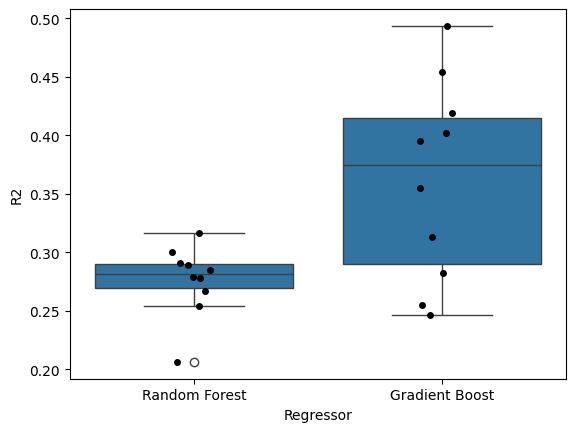

In [34]:
# Create dataframes for boxplot
rf_df = pd.DataFrame({'R2': rf_scores_r2, 'Regressor': ['Random Forest'] * 10})
gb_df = pd.DataFrame({'R2': gb_scores_r2, 'Regressor': ['Gradient Boost'] * 10})
both_df = pd.concat([rf_df, gb_df])

# Plot the boxplot and stripplot
sns.boxplot(x='Regressor', y='R2', data=both_df)
sns.stripplot(x='Regressor', y='R2', data=both_df, jitter=True, color='black')

How about that? They both seem to be performing vastly different. But for a general model Gradient Boost has a significantly more consistent R2 scores.

## Step 6: Reproducibility

[[ go back to the top ]](#Table-of-contents)

Ensuring that our work is reproducible is the last and — arguably — most important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

[Sebastian Raschka](http://sebastianraschka.com/) created a handy [notebook tool](https://github.com/rasbt/watermark) for this:

In [38]:
from watermark import watermark

In [41]:
%watermark -a 'Aymen A. Mohamed' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

UsageError: Line magic function `%watermark` not found.


Finally, let's extract the core of our work from Steps 1-5 and turn it into a single pipeline.

Predicted crop yield: [16702.08691862]
No matching data found.


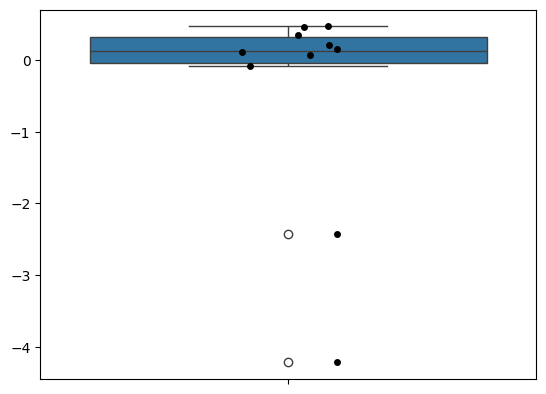

In [59]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
clean_data = pd.read_csv('tyclean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# Assertions to check if 'Yield' and 'Area Harvested' columns do not contain any zero values
assert (clean_data['Yield'] != 0).all(), "Yield column contains zero values"
assert (clean_data['Area_harvested'] != 0).all(), "Area Harvested column contains zero values"

X = df_encoded[['Area_harvested', 'temperature', 'precipitation', 'humidity', 'Soil_PH', 'Soil_Nitrogen', 'Soil_OM', 'VHI', 'ASI',
        'Category_Fruits', 'Category_Grains and Pulses', 'Category_Nuts and Seeds', 'Category_Other', 'Category_Other Crops',
        'Category_Stimulant and Spice Crops', 'Category_Vegetables']]
y = df_encoded['Yield']

# This is the regressor that came out of Grid Search
gradient_boost_regressor = GradientBoostingRegressor(n_estimators=50,
                                                criterion='friedman_mse',
                                                max_depth=5,
                                                max_features=4,
                                                random_state=42)

# Fit the model
gradient_boost_regressor.fit(X_train, y_train)

# All that's left to do now is plot the cross-validation scores
gb_regressor_scores = cross_val_score(gradient_boost_regressor, X, y, cv=10)
sns.boxplot(gb_regressor_scores)
sns.stripplot(gb_regressor_scores, jitter=True, color='black')

# Make predictions on new input data
def predict_yield(area_harvested, temperature, precipitation, humidity, soil_ph, soil_nitrogen, soil_om, vhi, asi,
                  category_fruits, category_grains, category_nuts, category_other, category_other_crops,
                  category_spice_crops, category_vegetables):
    input_data = pd.DataFrame({
        'Area_harvested': [area_harvested],
        'temperature': [temperature],
        'precipitation': [precipitation],
        'humidity': [humidity],
        'Soil_PH': [soil_ph],
        'Soil_Nitrogen': [soil_nitrogen],
        'Soil_OM': [soil_om],
        'VHI': [vhi],
        'ASI': [asi],
        'Category_Fruits': [category_fruits],
        'Category_Grains and Pulses': [category_grains],
        'Category_Nuts and Seeds': [category_nuts],
        'Category_Other': [category_other],
        'Category_Other Crops': [category_other_crops],
        'Category_Stimulant and Spice Crops': [category_spice_crops],
        'Category_Vegetables': [category_vegetables]
    })
   
    return gradient_boost_regressor.predict(input_data)

# Define the input data
input_data = {
    'Area_harvested': 113221.44,
    'temperature': 26.62,
    'precipitation': 1602.57,
    'humidity': 73.07,
    'Soil_PH': 5.03,
    'Soil_Nitrogen': 2.34,
    'Soil_OM': 2.91,
    'VHI': 0.49,
    'ASI': 8.9,
    'Category_Fruits': 1,
    'Category_Grains and Pulses': 0,
    'Category_Nuts and Seeds': 0,
    'Category_Other': 0,
    'Category_Other Crops': 0,
    'Category_Stimulant and Spice Crops': 0,
    'Category_Vegetables': 0
}

filtered_df = df_encoded[
    (df_encoded['Area_harvested'] == input_data['Area_harvested']) &
    (df_encoded['temperature'] == input_data['temperature']) &
    (df_encoded['precipitation'] == input_data['precipitation']) &
    (df_encoded['humidity'] == input_data['humidity']) &
    (df_encoded['Soil_PH'] == input_data['Soil_PH']) &
    (df_encoded['Soil_Nitrogen'] == input_data['Soil_Nitrogen']) &
    (df_encoded['Soil_OM'] == input_data['Soil_OM']) &
    (df_encoded['VHI'] == input_data['VHI']) &
    (df_encoded['ASI'] == input_data['ASI']) &
    (df_encoded['Category_Fruits'] == input_data['Category_Fruits']) &
    (df_encoded['Category_Grains and Pulses'] == input_data['Category_Grains and Pulses']) &
    (df_encoded['Category_Nuts and Seeds'] == input_data['Category_Nuts and Seeds']) &
    (df_encoded['Category_Other'] == input_data['Category_Other']) &
    (df_encoded['Category_Other Crops'] == input_data['Category_Other Crops']) &
    (df_encoded['Category_Stimulant and Spice Crops'] == input_data['Category_Stimulant and Spice Crops']) &
    (df_encoded['Category_Vegetables'] == input_data['Category_Vegetables'])
]

# Extract the yield value(s) from the filtered DataFrame
Actual_value = filtered_df['Yield']

# Example usage:
predicted_yield = predict_yield(9600, 26.4, 1632.68, 74.9, 5.31, 2.5, 2.66, 0.56, 16.26, 0, 0, 1, 0, 0, 0, 0)
print("Predicted crop yield:", predicted_yield)
if Actual_value.empty:
    print("No matching data found.")
else:
    print("Actual Value:", Actual_value.values[0])

In [ ]:
	Area_harvested	Yield	temperature	precipitation	humidity	Soil_PH	Soil_Nitrogen	Soil_OM	VHI	ASI	Category_Fruits	Category_Grains and Pulses	Category_Nuts and Seeds	Category_Other	Category_Other Crops	Category_Stimulant and Spice Crops	Category_Vegetables
1	9600.0	15625.0	26.4	1632.68	74.9	5.31	2.5	2.66	0.56	16.26	False	False	True	False	False	False	False

There we have it: We have a complete and reproducible Machine Learning pipeline to demo that takes in values of various climate/soil factors for different countries and provides a baseline calculation on whether a country is overperforming or underperforming in crop production.

## Conclusions

[[ go back to the top ]](#Table-of-contents)

I hope you found this project informative and inspiring.

If you've spotted any errors or would like to contribute to this notebook, please don't hestitate to get in touch. I can be reached in the following ways:

* [Github](https://github.com/Aymenm23) 

* [LinkedIn](https://www.linkedin.com/in/aymen-mohamed-datascience/)

* [Email](Aymenmoe7032@gmail.com) me


## Further reading

[[ go back to the top ]](#Table-of-contents)

This notebook covers a broad variety of topics but skips over many of the specifics. If you're looking to dive deeper into a particular topic, here's some recommended reading.

**Precision Agriculture**: The National Institute of Food and Agriculture wrote a informative [Article](https://www.nifa.usda.gov/grants/programs/precision-geospatial-sensor-technologies-programs/precision-agriculture-crop-production) on the USDA website explaining what precision agriculture is and how it can be beneficial in the longrun.

**Global Hunger Index**: The GHI [Homepage](https://www.globalhungerindex.org/) is a very immersive website containing links to relevant datasets, articless, videos, etc. for the ongoing humanitatian crises around the world. 



## Acknowledgements

[[ go back to the top ]](#Table-of-contents)

Many thanks to Laura Cornejo Paulino and Paul Smith for their advice and guidance in the development of this project.
